# <div align='center' id="top"> Testing  age prediction task  </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

In [2]:
# Load the trained model
model = load_model("vgg_age.h5")

In [3]:
def predict_age(image_path, model):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Resize to 112x112 and normalize
    input_img = cv2.resize(img, (112, 112))
    input_img = input_img.astype("float32") / 255.0

    # Reshape to match model input: (1, 112, 112, 1)
    input_img = np.expand_dims(input_img, axis=-1)  # (112, 112, 1)
    input_img = np.expand_dims(input_img, axis=0)   # (1, 112, 112, 1)

    # Predict age
    predicted_age = model.predict(input_img)[0][0]
    print(f"📷 Predicted Age: {predicted_age:.2f} years")

    # Plot the image with the predicted age
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Age: {predicted_age:.1f} yrs", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return predicted_age



1/1 [==============================] - 0s 44ms/step
📷 Predicted Age: 18.58 years


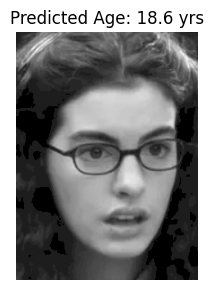

In [35]:
predicted_age = predict_age("2000.png", model)

1/1 [==============================] - 0s 52ms/step
📷 Predicted Age: 25.78 years


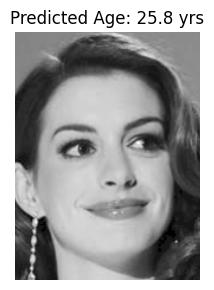

In [34]:
predicted_age = predict_age("2010.png", model)


1/1 [==============================] - 0s 46ms/step
📷 Predicted Age: 37.21 years


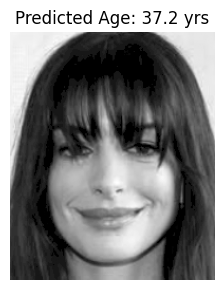

In [31]:
predicted_age = predict_age("2025.png", model)
